# Calculate heatmaps
As input serves path to best model locations

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import scipy.sparse
#import scgen
import matplotlib.pyplot as plt
import seaborn as sns
#import harmonypy as hpy
#import anndata
#import scanpy as sc
import sys
sys.path.append('C:\\Users\\vfriedrich\\projects\\cov\\backup\\v228_backup_12_07')
import os

def add_closeness_score_PR(df_PR):
    dpts = df_PR.values[:,1]
    min_val = min(dpts)
    max_val = max(dpts)
    vis_shift = 0.1*(max_val - min_val)
    closeness = (dpts - min_val) + vis_shift
    closeness_score = 1-closeness/closeness.sum(0)
    df_PR['closeness_score'] = closeness_score

def make_pivot_undirected_ma(celltype,best_run,species = 'ma'):
    path = 'C:\\Users\\vfriedrich\\projects\\cov\\backup\\v228_backup_12_07\\results_v228_1\\' + species + '\\' + celltype + '\\' + best_run + '\\figures\\dpt_df'
    df_3 = pd.read_csv(path + '\\df_3.csv')
    add_closeness_score_PR(df_3)
    df_3['WHO'] = '3'

    df_4 = pd.read_csv(path + '\\df_4.csv')
    add_closeness_score_PR(df_4)
    df_4['WHO'] = '4'

    df_5 = pd.read_csv(path + '\\df_5.csv')
    add_closeness_score_PR(df_5)
    df_5['WHO'] = '5'

    df_7 = pd.read_csv(path + '\\df_7.csv')
    add_closeness_score_PR(df_7)
    df_7['WHO'] = '7'

    df_all_reverse = df_3.append(df_4).append(df_5).append(df_7)
    df_all_pivot_reverse = df_all_reverse.pivot("timepoint","WHO", "closeness_score").astype(float)

    df_d2 = pd.read_csv(path + '\\df_d2.csv')[0:4]
    add_closeness_score_PR(df_d2)
    df_d2['day'] = 'd2'

    df_d3 = pd.read_csv(path + '\\df_d3.csv')[0:4]
    add_closeness_score_PR(df_d3)
    df_d3['day'] = 'd3'

    df_d5 = pd.read_csv(path + '\\df_d5.csv')[0:4]
    add_closeness_score_PR(df_d5)
    df_d5['day'] = 'd5'

    df_e14 = pd.read_csv(path + '\\df_e14.csv')[0:4]
    add_closeness_score_PR(df_e14)
    df_e14['day'] = 'e14'


    df_hamster = df_d2.append(df_d3).append(df_d5).append(df_e14)
    df_hamster_pivot = df_hamster.pivot("day", "cov_degree", "closeness_score").astype(float)

    df_pivot_undirected = df_hamster_pivot*df_all_pivot_reverse
    
    #df_pivot_undirected = df_pivot_undirected.rename(index={'d2': '2 dpi'})
    #df_pivot_undirected = df_pivot_undirected.rename(index={'d3': '3 dpi'})
    #df_pivot_undirected = df_pivot_undirected.rename(index={'d5': '5 dpi'})
    #df_pivot_undirected = df_pivot_undirected.rename(index={'e14': '14 dpi'})

    #df_pivot_undirected = df_pivot_undirected.rename(columns={'3': 'WHO 3'})
    #df_pivot_undirected = df_pivot_undirected.rename(columns={'4': 'WHO 4'})
    #df_pivot_undirected = df_pivot_undirected.rename(columns={'5': 'WHO 5'})
    #df_pivot_undirected = df_pivot_undirected.rename(columns={'7': 'WHO 7'})
    return df_pivot_undirected

def make_pivot_undirected_pr(celltype,best_run,species = 'pr'):
    path = 'C:\\Users\\vfriedrich\\projects\\cov\\backup\\v228_backup_12_07\\results_v228_1\\' + species + '\\' + celltype + '\\' + best_run + '\\figures\\dpt_df'
    df_3 = pd.read_csv(path + '\\df_3.csv')
    add_closeness_score_PR(df_3)
    df_3['WHO'] = '3'

    df_4 = pd.read_csv(path + '\\df_4.csv')
    add_closeness_score_PR(df_4)
    df_4['WHO'] = '4'

    df_5 = pd.read_csv(path + '\\df_5.csv')
    add_closeness_score_PR(df_5)
    df_5['WHO'] = '5'

    df_7 = pd.read_csv(path + '\\df_7.csv')
    add_closeness_score_PR(df_7)
    df_7['WHO'] = '7'

    df_all_reverse = df_3.append(df_4).append(df_5).append(df_7)
    df_all_pivot_reverse = df_all_reverse.pivot("timepoint","WHO", "closeness_score").astype(float)

    df_hd_D2 = pd.read_csv(path + '\\df_hd_D2.csv')[0:4]
    add_closeness_score_PR(df_hd_D2)
    df_hd_D2['day'] = 'hd D2'
    df_hd_D2['timepoint'] = 'hd_D2'

    df_hd_D3 = pd.read_csv(path + '\\df_hd_D3.csv')[0:4]
    add_closeness_score_PR(df_hd_D3)
    df_hd_D3['day'] = 'hd D3'
    df_hd_D3['timepoint'] = 'hd_D3'

    df_ld_D2 = pd.read_csv(path + '\\df_ld_D2.csv')[0:4]
    add_closeness_score_PR(df_ld_D2)
    df_ld_D2['day'] = 'ld D2'
    df_ld_D2['timepoint'] = 'ld_D2'

    df_ld_D3 = pd.read_csv(path + '\\df_ld_D3.csv')[0:4]
    add_closeness_score_PR(df_ld_D3)
    df_ld_D3['day'] = 'ld D3'
    df_ld_D3['timepoint'] = 'ld_D3'


    df_hamsterPR = df_hd_D2.append(df_hd_D3).append(df_ld_D2).append(df_ld_D3)
    df_hamsterPR_pivot = df_hamsterPR.pivot("timepoint", "cov_degree", "closeness_score").astype(float)

    df_pivot_undirected = df_hamsterPR_pivot*df_all_pivot_reverse
    return df_pivot_undirected

def rename_outcome_ma(out):
    out = out.rename(index={'d2': '2 dpi'})
    out = out.rename(index={'d3': '3 dpi'})
    out = out.rename(index={'d5': '5 dpi'})
    out = out.rename(index={'e14': '14 dpi'})

    out = out.rename(columns={'3': 'WHO 3'})
    out = out.rename(columns={'4': 'WHO 4'})
    out = out.rename(columns={'5': 'WHO 5'})
    out = out.rename(columns={'7': 'WHO 7'})
    return out

def rename_outcome_pr(out):
    out = out.rename(index={'hd_D2': '2 dpi hd'})
    out = out.rename(index={'hd_D3': '3 dpi hd'})
    out = out.rename(index={'ld_D2': '2 dpi ld'})
    out = out.rename(index={'ld_D3': '3 dpi ld'})

    out = out.rename(columns={'3': 'WHO 3'})
    out = out.rename(columns={'4': 'WHO 4'})
    out = out.rename(columns={'5': 'WHO 5'})
    out = out.rename(columns={'7': 'WHO 7'})
    return out

In [4]:
save_folder_pillai = 'C:\\Users\\vfriedrich\\projects\\cov\\backup\\v228_backup_12_07\\results_v228_1\\model_selection\\pillais_trace\\'
best_models = pd.read_csv(save_folder_pillai + 'v18_best_models_final.csv',index_col = 0)

# ma

In [5]:
celltype = 'CD4+_T_Cells'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
CD4_T_Cells = make_pivot_undirected_ma(celltype,best_run)
CD4_T_Cells = rename_outcome_ma(CD4_T_Cells)

celltype = 'CD8+_T_Cells'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
CD8_T_Cells = make_pivot_undirected_ma(celltype,best_run)
CD8_T_Cells = rename_outcome_ma(CD8_T_Cells)

celltype = 'Classical_Monocytes'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
Classical_Monocytes = make_pivot_undirected_ma(celltype,best_run)
Classical_Monocytes = rename_outcome_ma(Classical_Monocytes)

celltype = 'B_Cells'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
B_Cells = make_pivot_undirected_ma(celltype,best_run)
B_Cells = rename_outcome_ma(B_Cells)

celltype = 'NK_Cells'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
NK_Cells = make_pivot_undirected_ma(celltype,best_run)
NK_Cells = rename_outcome_ma(NK_Cells)

celltype = 'Non_Classical_Monocytes'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
Non_Classical_Monocytes = make_pivot_undirected_ma(celltype,best_run)
Non_Classical_Monocytes = rename_outcome_ma(Non_Classical_Monocytes)

celltype = 'Neutrophils_acurate'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
Neutrophils_acurate = make_pivot_undirected_ma(celltype,best_run)
Neutrophils_acurate = rename_outcome_ma(Neutrophils_acurate)

celltype = 'Immature_Neutrophils_acurate'
species = 'ma'
best_run = best_models.loc[celltype]['best_model_' + species]
Immature_Neutrophils_acurate = make_pivot_undirected_ma(celltype,best_run)
Immature_Neutrophils_acurate = rename_outcome_ma(Immature_Neutrophils_acurate)

C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reverse = df_3.append(df_4).append(df_5).append(df_7)
C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reverse = df_3.append(df_4).append(df_5).append(df_7)
C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hamster = df_d2.append(df_d3).append(df_d5).append(df_e14)
C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:64: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead

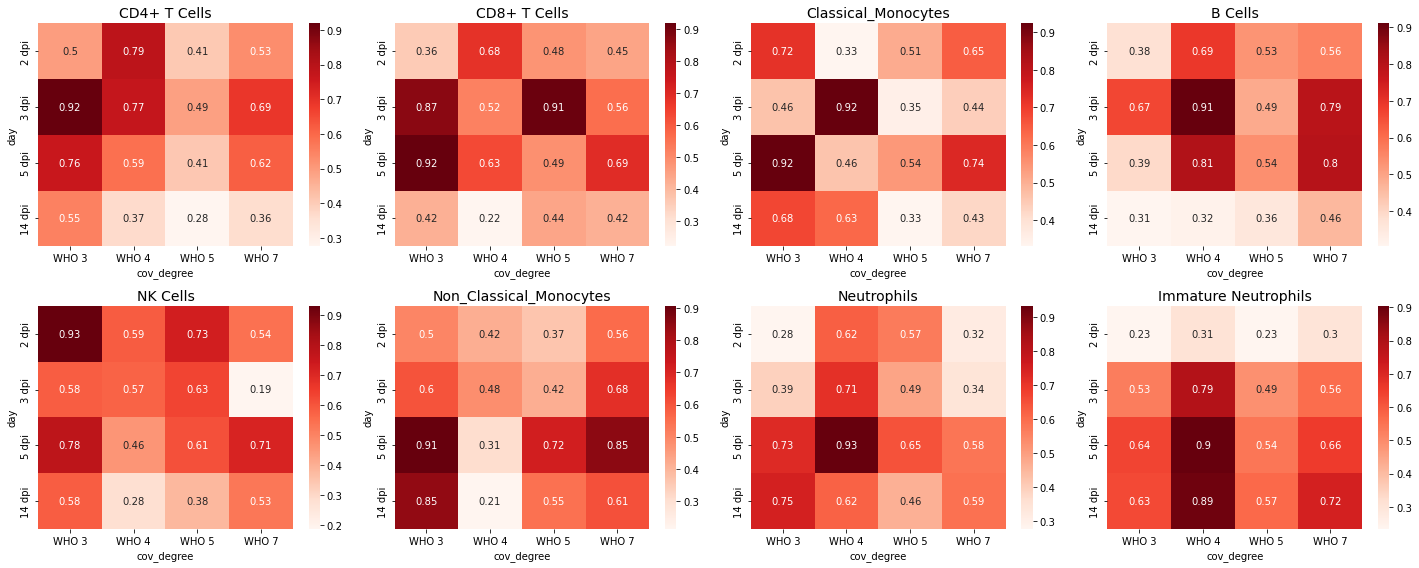

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.heatmap(CD4_T_Cells,cmap = "Reds",annot=True,ax = axes[0,0])
axes[0,0].set_title('CD4+ T Cells',fontsize = 14)
sns.heatmap(CD8_T_Cells,cmap = "Reds",annot=True,ax = axes[0,1])
axes[0,1].set_title('CD8+ T Cells',fontsize = 14)

sns.heatmap(Classical_Monocytes,cmap = "Reds",annot=True,ax = axes[0,2])
axes[0,2].set_title('Classical_Monocytes',fontsize = 14)

sns.heatmap(B_Cells,cmap = "Reds",annot=True,ax = axes[0,3])
axes[0,3].set_title('B Cells',fontsize = 14)

sns.heatmap(NK_Cells,cmap = "Reds",annot=True,ax = axes[1,0])
axes[1,0].set_title('NK Cells',fontsize = 14)

sns.heatmap(Non_Classical_Monocytes,cmap = "Reds",annot=True,ax = axes[1,1])
axes[1,1].set_title('Non_Classical_Monocytes',fontsize = 14)

sns.heatmap(Neutrophils_acurate,cmap = "Reds",annot=True,ax = axes[1,2])
axes[1,2].set_title('Neutrophils',fontsize = 14)

sns.heatmap(Immature_Neutrophils_acurate,cmap = "Reds",annot=True,ax = axes[1,3])
axes[1,3].set_title('Immature Neutrophils',fontsize = 14)
#for ax in axes.flat:
#    ax.tick_params(axis='y', labelrotation=90)
plt.tight_layout()
plt.savefig('LOK2_v228_1_figure_2_ma.pdf',bbox_inches='tight')

# pr

In [11]:
celltype = 'CD4+_T_Cells'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
CD4_T_Cells = make_pivot_undirected_pr(celltype,best_run)
CD4_T_Cells = rename_outcome_pr(CD4_T_Cells)

celltype = 'CD8+_T_Cells'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
CD8_T_Cells = make_pivot_undirected_pr(celltype,best_run)
CD8_T_Cells = rename_outcome_pr(CD8_T_Cells)

celltype = 'Classical_Monocytes'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
Classical_Monocytes = make_pivot_undirected_pr(celltype,best_run)
Classical_Monocytes = rename_outcome_pr(Classical_Monocytes)

celltype = 'B_Cells'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
B_Cells = make_pivot_undirected_pr(celltype,best_run)
B_Cells = rename_outcome_pr(B_Cells)

celltype = 'NK_Cells'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
NK_Cells = make_pivot_undirected_pr(celltype,best_run)
NK_Cells = rename_outcome_pr(NK_Cells)

celltype = 'Non_Classical_Monocytes'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
Non_Classical_Monocytes = make_pivot_undirected_pr(celltype,best_run)
Non_Classical_Monocytes = rename_outcome_pr(Non_Classical_Monocytes)

celltype = 'Neutrophils_acurate'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
Neutrophils_acurate = make_pivot_undirected_pr(celltype,best_run)
Neutrophils_acurate = rename_outcome_pr(Neutrophils_acurate)

celltype = 'Immature_Neutrophils_acurate'
species = 'pr'
best_run = best_models.loc[celltype]['best_model_' + species]
Immature_Neutrophils_acurate = make_pivot_undirected_pr(celltype,best_run)
Immature_Neutrophils_acurate = rename_outcome_pr(Immature_Neutrophils_acurate)

C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reverse = df_3.append(df_4).append(df_5).append(df_7)
C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_reverse = df_3.append(df_4).append(df_5).append(df_7)
C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_hamsterPR = df_hd_D2.append(df_hd_D3).append(df_ld_D2).append(df_ld_D3)
C:\Users\vfriedrich\AppData\Local\Temp\ipykernel_336\529962555.py:122: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

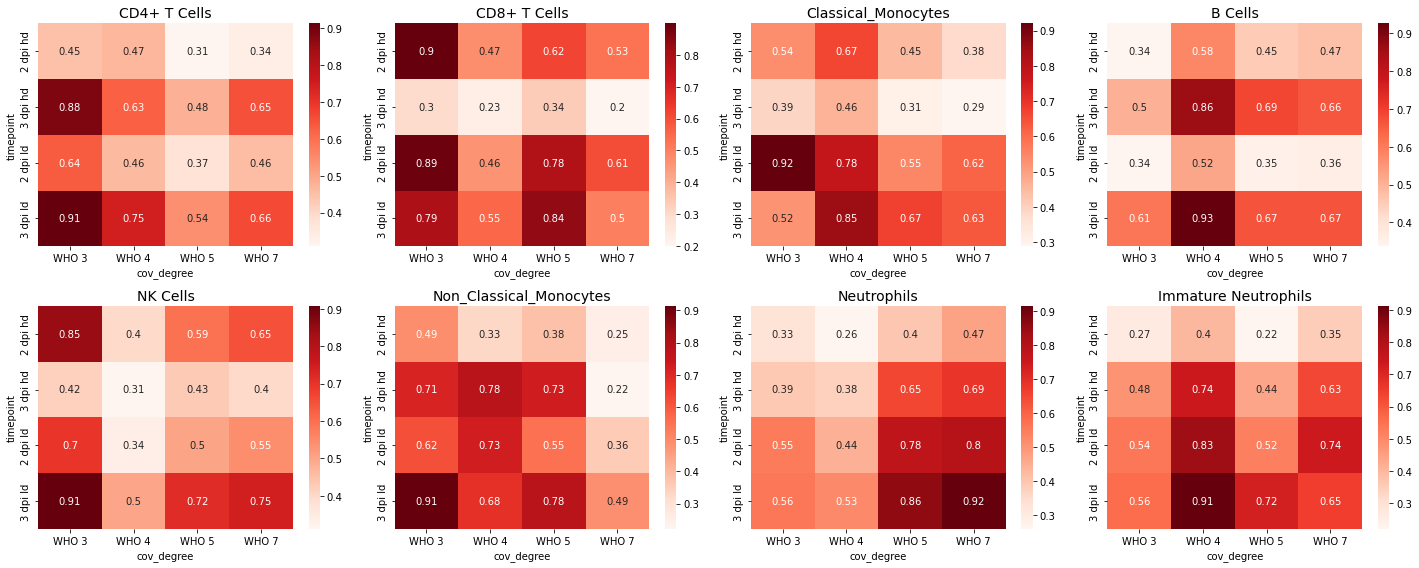

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
sns.heatmap(CD4_T_Cells,cmap = "Reds",annot=True,ax = axes[0,0])
axes[0,0].set_title('CD4+ T Cells',fontsize = 14)
sns.heatmap(CD8_T_Cells,cmap = "Reds",annot=True,ax = axes[0,1])
axes[0,1].set_title('CD8+ T Cells',fontsize = 14)

sns.heatmap(Classical_Monocytes,cmap = "Reds",annot=True,ax = axes[0,2])
axes[0,2].set_title('Classical_Monocytes',fontsize = 14)

sns.heatmap(B_Cells,cmap = "Reds",annot=True,ax = axes[0,3])
axes[0,3].set_title('B Cells',fontsize = 14)

sns.heatmap(NK_Cells,cmap = "Reds",annot=True,ax = axes[1,0])
axes[1,0].set_title('NK Cells',fontsize = 14)

sns.heatmap(Non_Classical_Monocytes,cmap = "Reds",annot=True,ax = axes[1,1])
axes[1,1].set_title('Non_Classical_Monocytes',fontsize = 14)

sns.heatmap(Neutrophils_acurate,cmap = "Reds",annot=True,ax = axes[1,2])
axes[1,2].set_title('Neutrophils',fontsize = 14)

sns.heatmap(Immature_Neutrophils_acurate,cmap = "Reds",annot=True,ax = axes[1,3])
axes[1,3].set_title('Immature Neutrophils',fontsize = 14)
#for ax in axes.flat:
#    ax.tick_params(axis='y', labelrotation=90)
plt.tight_layout()
plt.savefig('LOK2_v228_1_figure_2_pr.pdf',bbox_inches='tight')